In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import matplotlib.cm as cm

random_state = 0 # Magic

# First look
- Load data
- Are there any inf/nans? Why?

In [2]:
complete_df = pd.read_csv("../../data/raw/zebrafish26.01.2017_fish0.csv")

In [3]:
complete_df.describe()

,frame,ACCELERATION#pcentroid (cm/s2),ACCELERATION#smooth#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),MIDLINE_OFFSET,NEIGHBOR_DISTANCE (cm),SPEED#centroid (cm/s),...,SPEED#pcentroid (cm/s),SPEED#smooth#pcentroid (cm/s),SPEED (cm/s),SPEED#smooth (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),fixed_midline,time#centroid
count,958978.000000,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,...,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05,9.589780e+05
mean,479488.500000,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
std,276833.247562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,7.354090e-02,-3.141590e+00,-1.884410e+04,-1.942730e+04,1.125540e+00,-1.121920e+00,1.737410e-01,0.000000e+00,...,0.000000e+00,4.232270e-04,0.000000e+00,6.288350e-04,-7.309070e+01,-6.792970e+01,-1.380340e+01,-1.381970e+01,-1.181370e+00,0.000000e+00
25%,239744.250000,1.469723e+02,3.483602e+01,-1.676550e+00,-1.153318e+02,-1.179450e+02,3.447500e+00,-3.956847e-02,2.920400e+00,0.000000e+00,...,8.641083e-01,5.343650e-01,8.184000e-01,5.783308e-01,-9.167090e-01,-8.760080e-01,-7.757040e+00,-7.008145e+00,-4.033845e-02,1.817332e+03
50%,479488.500000,2.584780e+02,6.296240e+01,5.532660e-02,-4.723950e-01,-7.989480e-02,5.210050e+00,-9.927760e-03,6.734920e+00,2.758420e+00,...,1.704280e+00,1.181770e+00,1.592400e+00,1.278315e+00,-5.351560e-02,9.324600e-03,-2.585175e+00,-2.721570e+00,-9.768615e-03,3.634650e+03
75%,719232.750000,4.189098e+02,1.029068e+02,1.782140e+00,1.145220e+02,1.178390e+02,7.235890e+00,1.746588e-02,1.427507e+01,2.966910e+00,...,3.140027e+00,2.472793e+00,3.059240e+00,2.755745e+00,8.125000e-01,8.902158e-01,3.620365e+00,2.831398e+00,1.890450e-02,5.451970e+03
max,958977.000000,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [4]:
complete_df[: 10]

,frame,ACCELERATION#pcentroid (cm/s2),ACCELERATION#smooth#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),MIDLINE_OFFSET,NEIGHBOR_DISTANCE (cm),SPEED#centroid (cm/s),...,SPEED#pcentroid (cm/s),SPEED#smooth#pcentroid (cm/s),SPEED (cm/s),SPEED#smooth (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),fixed_midline,time#centroid
0,0,0.0000,211.1490,-2.67771,0.0000,0.0000,9.98357,0.041287,11.2067,0.00000,...,0.00000,1.63091,0.00000,1.66463,0.00000,0.000000,-3.61510,-3.72377,0.039028,0.000000
1,1,422.2980,150.8810,-2.70262,-403.7040,-151.0270,9.98357,0.047954,11.1925,0.00000,...,3.26183,2.22638,3.32927,2.14295,-3.11821,-1.166530,-3.63919,-3.73278,0.043989,0.007724
2,2,129.4640,87.8175,-2.62653,131.4630,-183.5450,9.93826,-0.008759,11.2391,6.47684,...,3.48279,2.33976,3.31538,2.60134,-2.14013,-2.532110,-3.65511,-3.75162,-0.008965,0.015164
3,3,173.8080,115.0920,-2.65401,-250.6490,204.9790,9.93826,0.003877,11.2553,0.00000,...,2.72459,3.23289,4.15233,3.38400,-4.03428,-0.983078,-3.68560,-3.75905,0.003429,0.022721
4,4,139.9930,14.3398,-2.63381,210.8210,-151.3890,9.90780,-0.004765,11.2736,3.88624,...,3.57858,3.17906,3.22170,3.09635,-2.38102,-2.170270,-3.70427,-3.77607,-0.005443,0.030563
5,5,60.6116,73.6548,-2.61964,80.3560,88.3652,9.87796,-0.036735,11.2899,4.65246,...,3.02450,2.85945,2.12261,3.15282,-1.63661,-1.351660,-3.71943,-3.78859,-0.034416,0.039827
6,6,211.5590,37.1509,-2.64112,-242.6120,-23.1524,9.86243,-0.004417,11.2781,3.71107,...,2.24526,3.17874,3.38870,3.14258,-3.04545,-1.486100,-3.73712,-3.79722,-0.005201,0.045634
7,7,268.6270,51.5325,-2.67903,-93.9421,12.7898,9.84749,0.010091,11.2804,2.84216,...,3.99429,2.84282,4.00626,2.83358,-3.75772,-1.389130,-3.76561,-3.80775,0.010209,0.053216
8,8,235.7750,76.1938,-2.63328,325.4710,-21.0665,9.81702,-0.011935,11.2968,4.05813,...,2.23314,2.37492,2.02962,2.87715,-1.31343,-1.547340,-3.77547,-3.81938,-0.012300,0.060726
9,9,162.1810,31.9736,-2.61952,-83.8787,51.0508,9.80203,-0.015432,11.2993,2.85736,...,1.17368,2.54471,2.26673,2.75843,-1.94604,-1.162310,-3.79015,-3.82814,-0.016421,0.068268


In [5]:
complete_df[np.isnan(complete_df)].count()

frame                                    0
ACCELERATION#pcentroid (cm/s2)           0
ACCELERATION#smooth#pcentroid (cm/s2)    0
ANGLE                                    0
AX                                       0
AY                                       0
BORDER_DISTANCE#pcentroid (cm)           0
MIDLINE_OFFSET                           0
NEIGHBOR_DISTANCE (cm)                   0
SPEED#centroid (cm/s)                    0
SPEED#smooth#centroid (cm/s)             0
SPEED#pcentroid (cm/s)                   0
SPEED#smooth#pcentroid (cm/s)            0
SPEED (cm/s)                             0
SPEED#smooth (cm/s)                      0
VX (cm/s)                                0
VY (cm/s)                                0
X (cm)                                   0
Y (cm)                                   0
fixed_midline                            0
time#centroid                            0
dtype: int64

In [6]:
complete_df[np.isinf(complete_df)].count()

frame                                       0
ACCELERATION#pcentroid (cm/s2)             19
ACCELERATION#smooth#pcentroid (cm/s2)      19
ANGLE                                      19
AX                                         19
AY                                         19
BORDER_DISTANCE#pcentroid (cm)             19
MIDLINE_OFFSET                             19
NEIGHBOR_DISTANCE (cm)                     22
SPEED#centroid (cm/s)                      10
SPEED#smooth#centroid (cm/s)               10
SPEED#pcentroid (cm/s)                     19
SPEED#smooth#pcentroid (cm/s)              19
SPEED (cm/s)                               19
SPEED#smooth (cm/s)                        19
VX (cm/s)                                  19
VY (cm/s)                                  19
X (cm)                                     19
Y (cm)                                     19
fixed_midline                            1872
time#centroid                              10
dtype: int64

## Subsample
Let's look at some of the data, consider a random subsample for quicker results.

Deal with Infs later!

In [7]:
# Remove inf/-inf/nan first
df = complete_df.replace([np.inf, -np.inf], np.nan).dropna()
df = df.sample(frac=0.1, random_state=np.random.RandomState(random_state))
df.describe()

,frame,ACCELERATION#pcentroid (cm/s2),ACCELERATION#smooth#pcentroid (cm/s2),ANGLE,AX,AY,BORDER_DISTANCE#pcentroid (cm),MIDLINE_OFFSET,NEIGHBOR_DISTANCE (cm),SPEED#centroid (cm/s),...,SPEED#pcentroid (cm/s),SPEED#smooth#pcentroid (cm/s),SPEED (cm/s),SPEED#smooth (cm/s),VX (cm/s),VY (cm/s),X (cm),Y (cm),fixed_midline,time#centroid
count,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,...,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000,95710.000000
mean,478647.154268,315.186973,76.323708,0.043079,0.950917,0.037198,5.550725,-0.007518,8.904601,2.110786,...,2.274842,1.766384,2.233740,1.888710,0.001033,-0.001463,-1.707305,-1.941017,-0.007167,3628.272620
std,275879.489037,238.782574,57.626495,1.905026,244.772412,239.660594,2.810733,0.113732,6.803877,2.184954,...,1.922207,1.673952,2.062898,1.745023,2.162301,2.137673,6.915059,6.542550,0.128075,2091.238610
min,7.000000,0.738594,0.243430,-3.141580,-17659.100000,-16548.900000,1.143240,-1.034160,0.260390,0.000000,...,0.001008,0.003378,0.002443,0.001246,-63.436700,-63.798500,-13.803400,-13.804900,-1.123650,0.053216
25%,241660.750000,146.917500,34.747725,-1.683490,-115.347750,-117.788250,3.468822,-0.039826,2.901660,0.000000,...,0.869415,0.537489,0.819900,0.577720,-0.915813,-0.874705,-7.723903,-7.033598,-0.040598,1831.855000
50%,478191.500000,259.472500,63.238250,0.048090,-0.149924,0.398128,5.206460,-0.010022,6.660150,2.758420,...,1.705010,1.181800,1.592630,1.274900,-0.052293,0.010875,-2.517310,-2.774320,-0.009973,3624.815000
75%,716788.000000,419.036750,103.348000,1.776203,114.711000,119.262750,7.243430,0.017465,14.184275,2.966132,...,3.124918,2.456717,3.047880,2.747290,0.816486,0.891913,3.668125,2.766818,0.018725,5433.442500
max,958965.000000,4243.340000,1279.040000,3.141570,15680.900000,7911.150000,14.937800,0.735375,27.137500,20.805300,...,23.147600,19.689100,66.674400,20.850100,66.627300,58.898200,13.810900,13.863400,1.164540,7269.210000


# Some summary stats
- Where are the fish located mostly?
- How fast are they?
- How close are they to the border?
- How close are they to each other?

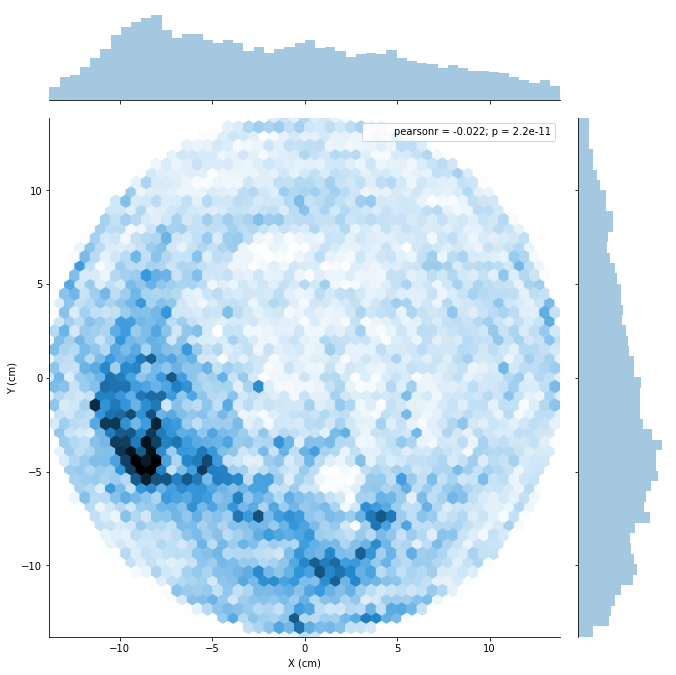

In [8]:
# Look at the density of the position.
x = df['X (cm)']
y = df['Y (cm)']
fig = sns.jointplot(x,y, kind='hex')
fig.fig.set_figwidth(10)
fig.fig.set_figheight(10)

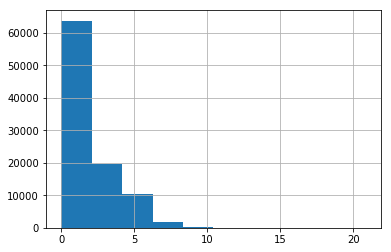

In [9]:
df['SPEED#smooth (cm/s)'].hist()

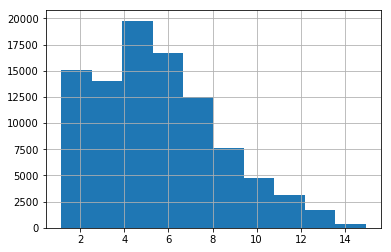

In [10]:
df['BORDER_DISTANCE#pcentroid (cm)'].hist()

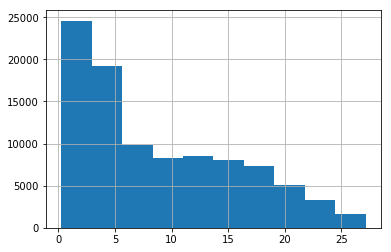

In [11]:
df['NEIGHBOR_DISTANCE (cm)'].hist()